In [44]:
import pandas as pd
import re
import numpy as np
from wordcloud import WordCloud
from data_visualization import barh_chart
import matplotlib.pyplot as plt

### REMEMBER TO GIVE BETTER LABELS
Make different type of graphs to get more interesting presentation between them. This keeps the viewer more interested. Look at relative analysis (correlation) after finishing this question-per-question analysis. Examples are technology choice (offshore/onshore) vs. landscape preference, schoolpreference within multiple groups and maybe transmission vs. import/export preferences.  

#### FOR THE MODEL
I 

In [45]:
# Read all the files
file_path_r = "files/raw"
file_path_m = "files/modified"
file_name = ["res-engelsk.xlsx","res-norsk.xlsx"]
all_data = []

for file in file_name:
    all_data.append(pd.read_excel(file_path_r + "/" + file,index_col=None))

# Combine all the tables together into one
data = pd.concat(all_data, axis = 0, ignore_index=True)

# Rename columns to fit the syntax
data = data.rename(columns={"$answer_time_ms":"answerTime_ms",
                     "$created":"created"})

# Remove unecessary column
data = data.drop('$submission_id',axis=1)

# Create a multi-level table
split_symbols = '[._]' # These define a level

columns = [re.split(split_symbols, c) for c in data.columns]
data.columns = pd.MultiIndex.from_tuples(columns, names = ['Main','Sub'])

C:\Users\nikoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\nikoo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


13
Index(['answerTime', 'code', 'created', 'electricProd', 'energySource',
       'importOutlook', 'opinions', 'powerLine', 'renewableVariance',
       'sunPower', 'windConsideration', 'windMun', 'windVisual'],
      dtype='object', name='Main')


Sub,NaN
0,Income\ncost\nnature
1,long term effect\nside effects
2,resident health\nspecies safety \nthe impact o...
3,1. effectiveness\n2. future inovation\n3.cost\...
4,1.Efficiency\n2.Net revenue\n3.Sustainability
...,...
60,NaN
61,Kostnader/utgifter \nMiljø\nTidsbruk av bygging
62,NaN
63,"Utvikling av samfunnet, økonomisk vekst, miljø..."


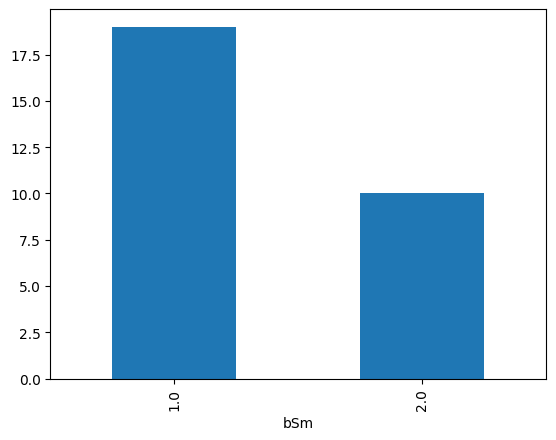

In [46]:
# Use the multilevel column data object
print(len(data.columns.levels[0]))
print(data.columns.levels[0])
#data["energySource"]["offOn"].value_counts().plot.bar()
#data["energySource"]["offOffs"].value_counts().plot.bar()
data["energySource"]["bSm"].value_counts().plot.bar()
#data["energySource"]["bBs"].value_counts().plot.bar()
#data["energySource"]["smSms"].value_counts().plot.bar()

data["code"]
data["opinions"]
data["energySource"]
data["windMun"]
data["windVisual"]
data["windConsideration"]
data["sunPower"]
data["electricProd"]
data["renewableVariance"]
data["importOutlook"]
data["powerLine"]

data["opinions"]

#Finish

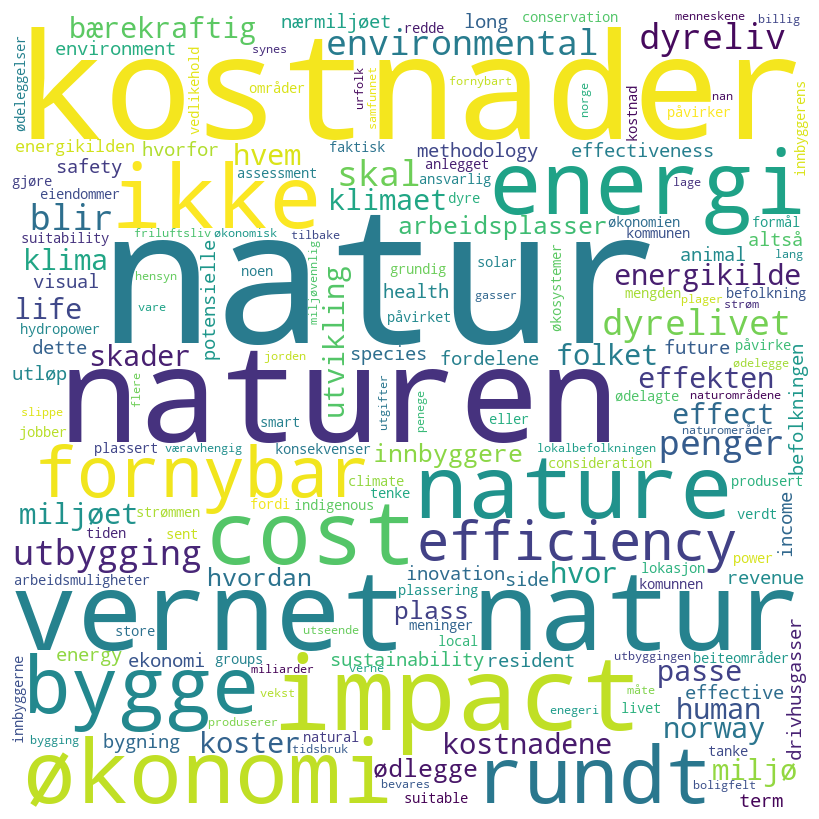

'natur',        10
'kostnader',     7
['natur',        6
['vernet',       6
'impact',        4
'natur']         4
'naturen']       4
'blir',          3
'bygge',         3
'cost',          3
dtype: int64


In [47]:
# wordcloud
words = data["opinions"].dropna(axis=0)

# Give new column name
column_name = "opinions"
words = words.rename(columns = {np.nan:"opinions"})

# Creaete a pandas.Series object and split it into words
split_symbols = "[\n1.2.3.() /,-]"
symbols = words["opinions"].apply(lambda x: list(filter(None, re.split(split_symbols, x.lower()))))

def remove_short(x: str):
    if (len(x) > 3):
        return x
    else:
        return None

symbols = symbols.apply(lambda x: list(filter(remove_short,x)))
text = symbols.explode().to_list() # Flatten the list  

# Create wordcloud
text_str = " ".join([str(t) for t in text]) # Convert to a string object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      stopwords = None,  # You can add a set of words to exclude here
                      min_font_size = 10).generate(text_str)

# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Create bag of words representation to find word frequency
bag_of_words = symbols.str.get_dummies(sep=' ')
word_counts = bag_of_words.sum(axis=0)
top_words = word_counts.nlargest(10)
print(top_words)

1.0    16
2.0    13
Name: count, dtype: int64
offOffs
2.0    19
1.0    17
Name: count, dtype: int64
            onshore  offshore
                 16        17
inc. solar       13        19


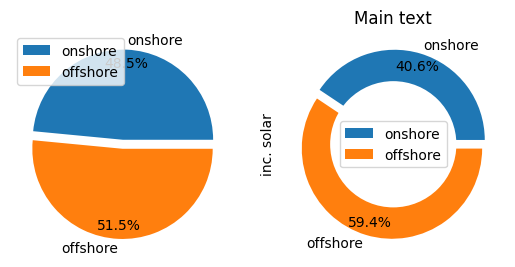

In [48]:
count_offshore = data["energySource"]["offOffs"].value_counts()
count_onshore_big = data["energySource"]["bBs"].value_counts()
count_onshore_small = data["energySource"]["smSms"].value_counts()

count_onshore = count_onshore_big + count_onshore_small

# See the values
print(count_onshore_small + count_onshore_big)
print(count_offshore)

# Combine into a dataframe and plot a simple bar-graph
wind_solar = pd.concat([count_onshore, count_offshore], axis = 1)
wind_solar.columns = ["onshore","offshore"]
wind_solar.index = ["","inc. solar"]

print(wind_solar)

# Convert to percentage and plot
total_responses = sum(wind_solar.aggregate(lambda x: x.sum()))

explode = (0.05,0.05)
wind_solar = wind_solar.apply(lambda x: (x / total_responses)*100) # Convert to percentage
wind_solar.T.plot(kind = "pie",subplots=True,autopct='%1.1f%%', pctdistance=0.85, explode = explode)
plt.title("Main text")
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


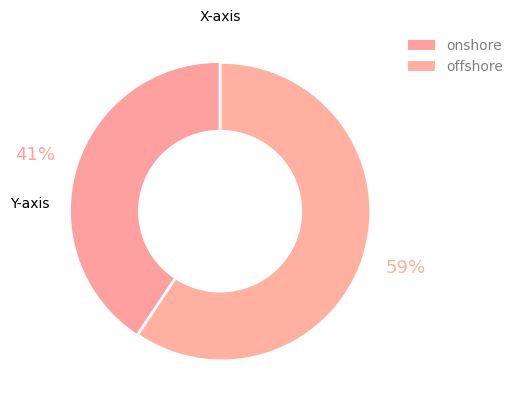

['onshore' 'offshore']


In [49]:
count_offshore = data["energySource"]["offOffs"].value_counts()
count_onshore_big = data["energySource"]["bBs"].value_counts()
count_onshore_small = data["energySource"]["smSms"].value_counts()

count_onshore = count_onshore_big + count_onshore_small

# See the values
#print(count_onshore_small + count_onshore_big)
#print(count_offshore)


from data_visualization import donut_plot

# Combine into a dataframe and plot a simple bar-graph
wind_solar = pd.concat([count_onshore, count_offshore], axis = 1)
wind_solar.columns = ["onshore","offshore"]
wind_solar.index = ["","inc. solar"]

#print(wind_solar)

# Convert to percentage and plot
total_responses = sum(wind_solar.aggregate(lambda x: x.sum()))

explode = (0.01,0.01) # TODO: Has to be the same size as x 
wind_solar = wind_solar.apply(lambda x: (x / total_responses)*100) # Convert to percentage

donut_plot(wind_solar.iloc[1])

print(wind_solar.iloc[0].index.values)

['left', 'right', 'bottom', 'top']
<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


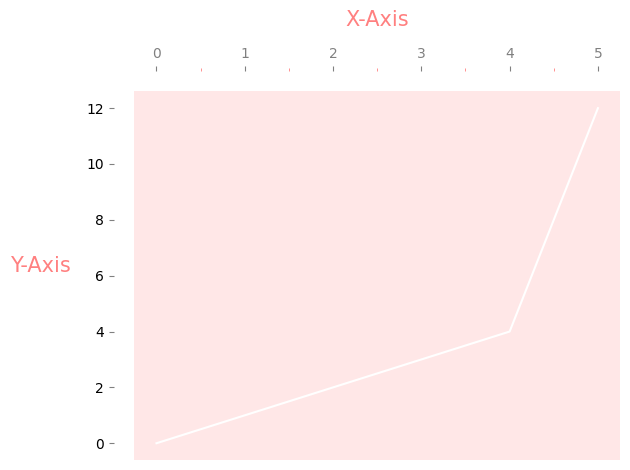

In [50]:
fig, ax = plt.subplots(nrows=1,ncols = 1)

# Remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# All keys for the spine-object
print([key for key in ax.spines.keys()])

# Move the left spine to the left
ax.spines["left"].set_position(position=('outward', 15))
ax.spines["top"].set_position(position=('outward',15))

print(type(fig))
print(type(ax))

# Values to plot
y_values = [0,1,2,3,4, 12]
ax.plot(y_values, color = "white")

# Set the colors
fig.set_facecolor(color = "white")
ax.set_facecolor(color = '#ff808030') # The last two digits are the alpha

# Change the ticks
major_xticks = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0]) * (len(y_values) - 1)
ax.set_xticks(major_xticks)

ax.tick_params(axis = "x", which = 'both', colors = "gray", top = True, bottom = False, labelbottom = False, labeltop = True)
ax.tick_params(axis = "y", color = "gray")

# Add minor ticks to the x-axis
ax.minorticks_on()

minor_xticks = (major_xticks[1:] + major_xticks[0:-1]) / 2 # Get the middle value
ax.set_xticks(minor_xticks, minor = True)
ax.tick_params(axis = 'x', which = 'minor', colors = '#ff8080ff') # Change the color for the minor-tick

ax.tick_params(axis='y', which = 'minor', left = False) # Remove the left, minor ticks

# Set labels
ax.set_xlabel(xlabel = "X-Axis", color = '#ff8080ff', loc = 'center', labelpad = 15, fontsize = 15, fontfamily = 'sans-serif')
ax.xaxis.set_label_position(position='top')

y_label = 'Y-Axis'
ax.set_ylabel(ylabel=y_label, color = '#ff8080ff', labelpad = 15 + len(y_label)*3, rotation = 'horizontal', fontsize = 15, fontfamily = 'sans-serif')

plt.tight_layout()
plt.show()

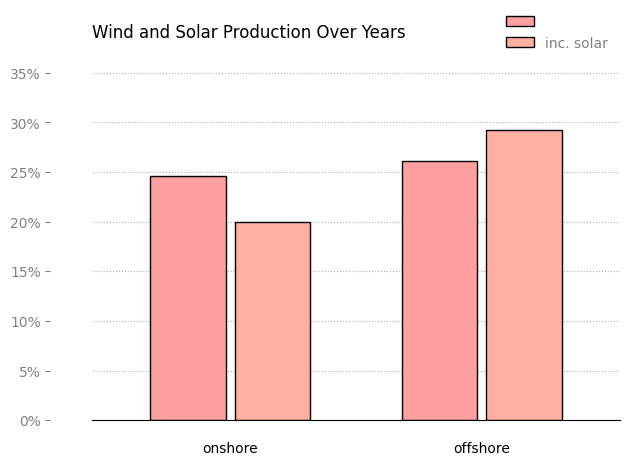

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']

# Remove all spines
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.spines["bottom"].set_visible(True)
# Add the dataplot with zorder 2 (to be on top)
bar_width = 0.6
(wind_solar.T).plot(kind='bar', ax=ax, colormap='copper', legend=False, zorder=2, width = bar_width)

# Ensure the highest point shown is above the highest point
max_value = (wind_solar.T).max().max()  # Find the maximum value in the dataset after multiplication
ax.set_ylim(0, max_value * 1.2)  # Increase the max limit by 10% for some padding

# Change y-axis
ax.spines['left'].set_position(position=('outward', 30))
ax.tick_params(axis='y', colors= 'gray')

# Change bar-colors and the padding between the bars
groups = statistics.median(range(len(wind_solar.T.columns)))
j, i = 0, 0
offset = bar_width * 0.03
for bar in ax.patches:
    # Adjust the padding calculation to account for the direction
    padding = -offset if i < groups else offset if i > groups else 0
    bar.set(facecolor = colors[i], x = bar.get_x() + padding,  edgecolor = "black")
    j += 1
    i = int(j / len(wind_solar.T.index))

# Change bar-text
ax.tick_params(axis='x', length=0, labelrotation=0, labelcolor= "black", pad=15)

# Change y-acis to percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Change legend
legend_values = wind_solar.T.columns
ax.legend(legend_values, loc='upper right', labelcolor="gray", facecolor="white", edgecolor="white", frameon=False, bbox_to_anchor=(1, 1.2))

# Add vertical box-lines with zorder 1 (behind the bars)
ax.yaxis.grid(visible=True, linestyle="dotted", zorder=1)
ax.set_axisbelow(True)

# Add title text
ax.set_title("Wind and Solar Production Over Years ", color = "black", pad = 25, loc = 'left')

plt.tight_layout()
plt.show()

In [52]:
# Plot the bars using pyplot
x_values = np.arange(len(wind_solar.T.index))
y_values = wind_solar.T.values
width = 0.3
padding = 1.1
print(x_values)

plt.bar(x = x_values - (width / 2) * padding, height = y_values[::2].flatten(), width = width)
plt.bar(x = x_values + (width / 2) * padding, height = y_values[1::2].flatten(), width = width)

plt.close()

[0 1]


            onshore  offshore
                 16        17
inc. solar       13        19


<Axes: >

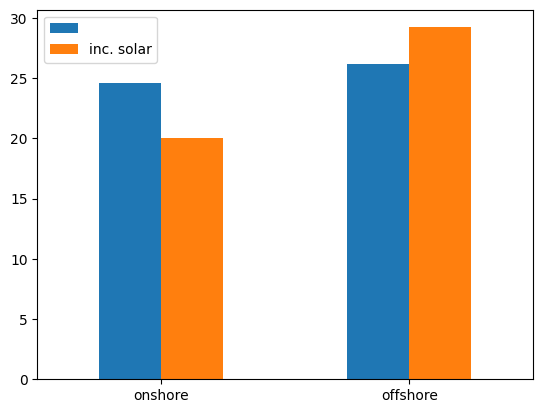

In [53]:
# TODO: split onshore into onshore big + small
count_offshore = data["energySource"]["offOffs"].value_counts()
count_onshore_big = data["energySource"]["bBs"].value_counts()
count_onshore_small = data["energySource"]["smSms"].value_counts()

count_onshore = count_onshore_big + count_onshore_small

# Combine into a dataframe and plot a simple bar-graph
wind_solar = pd.concat([count_onshore, count_offshore], axis = 1)
wind_solar.columns = ["onshore","offshore"]
wind_solar.index = ["","inc. solar"]

print(wind_solar)

# Convert to percentage and plot
total_responses = sum(wind_solar.aggregate(lambda x: x.sum()))
wind_solar = wind_solar.apply(lambda x: (x / total_responses)*100) # Convert to percentage
wind_solar.T.plot.bar(rot = 0)

Sub
ocean          6.865385
rock           6.269231
hill           5.961538
coast          5.326923
industry       5.153846
grass          5.000000
agriculture    4.000000
housing        3.115385
forest         2.961538
dtype: float64


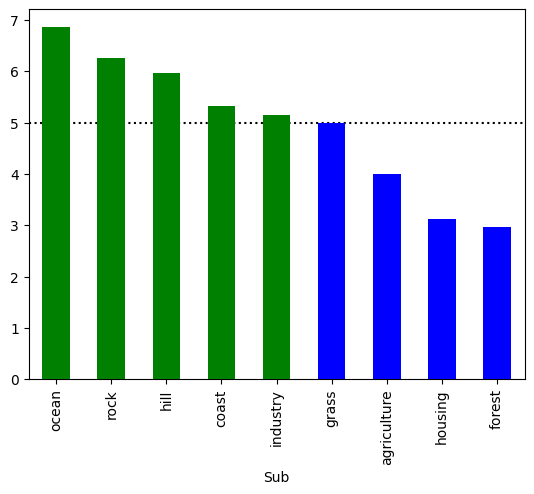

In [54]:
wind_visual = ((data["windVisual"]-1)*1.25).mean().sort_values(ascending = False)

print(wind_visual)

# TODO: set index to 1
# Barplot
center = 5
colors = ["green" if value > center else "blue" for value in wind_visual]
ax = wind_visual.plot.bar(color = colors,zorder = 3)
ax.axhline(y=center,color = "black",linestyle = "dotted",zorder = 2)

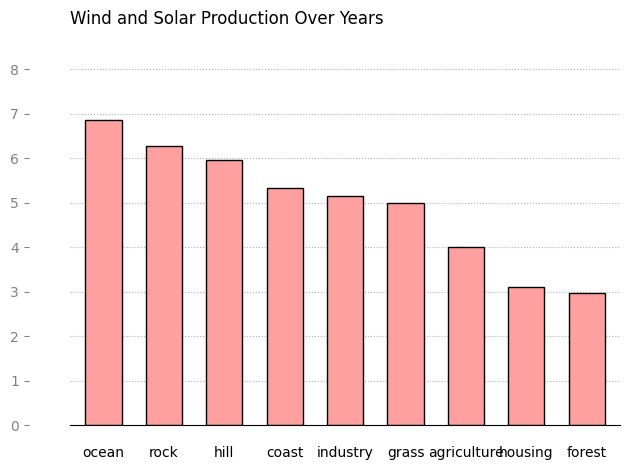

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']
plot_data = wind_visual.to_frame()

# Remove all spines
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.spines["bottom"].set_visible(True)
# Add the dataplot with zorder 2 (to be on top)
bar_width = 0.6
plot_data.plot(kind='bar', ax=ax, colormap='copper', legend=False, zorder=2, width = bar_width)

# Ensure the highest point shown is above the highest point
max_value = (plot_data).max().max()  # Find the maximum value in the dataset after multiplication
ax.set_ylim(0, max_value * 1.2)  # Increase the max limit by 10% for some padding

# Change y-axis
ax.spines['left'].set_position(position=('outward', 30))
ax.tick_params(axis='y', colors= 'gray')

# Change bar-colors and the padding between the bars
groups = statistics.median(range(len(plot_data.columns)))
j, i = 0, 0
offset = bar_width * 0.03
for bar in ax.patches:
    # Adjust the padding calculation to account for the direction
    padding = -offset if i < groups else offset if i > groups else 0
    bar.set(facecolor = colors[i], x = bar.get_x() + padding,  edgecolor = "black")
    j += 1
    i = int(j / len(plot_data.index))

# Change bar-text
ax.tick_params(axis='x', length=0, labelrotation=0, labelcolor= "black", pad=15)

# Change y-acis to percentage
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Change legend
legend_values = plot_data.columns
#ax.legend(legend_values, loc='upper right', labelcolor="gray", facecolor="white", edgecolor="white", frameon=False, bbox_to_anchor=(1, 1.2))

# Add vertical box-lines with zorder 1 (behind the bars)
ax.yaxis.grid(visible=True, linestyle="dotted", zorder=1)
ax.set_axisbelow(True)

# Remove x_label
ax.set_xlabel(None)

# Add title text
ax.set_title("Wind and Solar Production Over Years ", color = "black", pad = 25, loc = 'left')
plt.tight_layout()
plt.show()

In [56]:
# TODO: create a piechart of the groups above as a relative portion (This is extremely ugly)
# TODO: make a linedistribution of each landscape 
# Look at a way to group the linedistributions (All lines should be visible from the same graph!)
# TODO: show the relative portion of answers above 5 within each subgroup

Sub
city              2.753846
closeness         2.830769
nature            2.984615
remote            3.153846
infrastructure    3.276923
economic          3.384615
ecological        3.815385
dtype: float64


[]

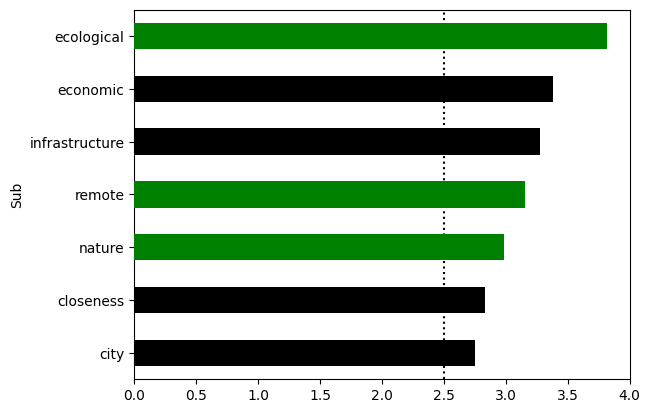

In [57]:
wind_consideration = data["windConsideration"].mean().sort_values(ascending = True)

print(wind_consideration)

# TODO: set index to 1
center = 5/2
untouched_nature = ["remote","nature","ecological"]
colors = ["green" if col in untouched_nature else "black" for col in wind_consideration.index]
ax = wind_consideration.plot.barh(color = colors,zorder = 3)
ax.axvline(x=center,color = "black",linestyle = "dotted",zorder=2)
ax.plot()

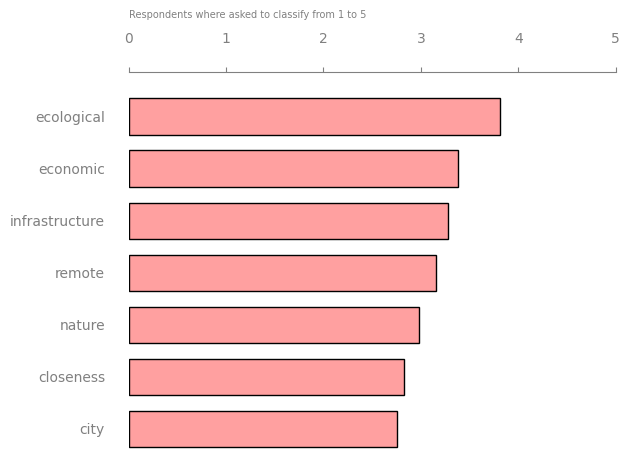

In [58]:
# TODO: plot the percentage for the Norwegian graph as percentage
barh_chart(wind_consideration.to_frame())

In [59]:
powerstation_consideration = data["electricProd"]

print(powerstation_consideration)

# TODO: look at correlation in the way students responded (for example relation between cost -> not nature or similar)
# The sum is not that interesting since they are quite similar
print(data["electricProd"].aggregate(lambda x: x.sum()))

# TODO: make a pychart 

Sub  pollution  capacity  cost  ecological
0            1         1     1           0
1            1         0     0           1
2            0         0     1           1
3            0         1     0           0
4            0         0     1           1
..         ...       ...   ...         ...
60           1         1     1           1
61           0         1     1           0
62           1         1     1           1
63           0         1     1           0
64           1         1     1           1

[65 rows x 4 columns]
Sub
pollution     37
capacity      39
cost          34
ecological    35
dtype: int64


category
storing        20
trading        20
exporting      19
consumption     6
Name: category, dtype: int64


<Axes: xlabel='category'>

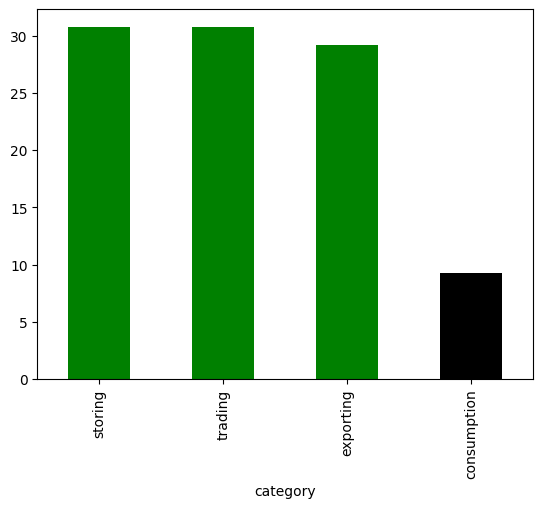

In [60]:
renewable_variance = data["renewableVariance"]
renewable_variance.columns = ["category"]

# Count the amount of chosen category
renewable_variance = renewable_variance.groupby('category')['category'].count().sort_values(ascending = False)

print(renewable_variance)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100

min_value = renewable_variance.min()
colors = ["green" if (val > min_value) else "black" for val in renewable_variance]
renewable_variance.plot.bar(color = colors)

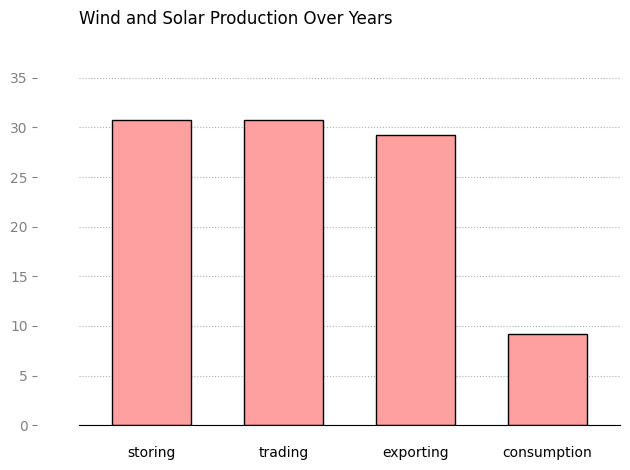

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']
plot_data = renewable_variance.to_frame()

# Remove all spines
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.spines["bottom"].set_visible(True)
# Add the dataplot with zorder 2 (to be on top)
bar_width = 0.6
plot_data.plot(kind='bar', ax=ax, colormap='copper', legend=False, zorder=2, width = bar_width)

# Ensure the highest point shown is above the highest point
max_value = (plot_data).max().max()  # Find the maximum value in the dataset after multiplication
ax.set_ylim(0, max_value * 1.2)  # Increase the max limit by 10% for some padding

# Change y-axis
ax.spines['left'].set_position(position=('outward', 30))
ax.tick_params(axis='y', colors= 'gray')

# Change bar-colors and the padding between the bars
groups = statistics.median(range(len(plot_data.columns)))
j, i = 0, 0
offset = bar_width * 0.03
for bar in ax.patches:
    # Adjust the padding calculation to account for the direction
    padding = -offset if i < groups else offset if i > groups else 0
    bar.set(facecolor = colors[i], x = bar.get_x() + padding,  edgecolor = "black")
    j += 1
    i = int(j / len(plot_data.index))

# Change bar-text
ax.tick_params(axis='x', length=0, labelrotation=0, labelcolor= "black", pad=15)

# Change y-acis to percentage
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Change legend
legend_values = plot_data.columns
#ax.legend(legend_values, loc='upper right', labelcolor="gray", facecolor="white", edgecolor="white", frameon=False, bbox_to_anchor=(1, 1.2))

# Add vertical box-lines with zorder 1 (behind the bars)
ax.yaxis.grid(visible=True, linestyle="dotted", zorder=1)
ax.set_axisbelow(True)

# Remove x_label
ax.set_xlabel(None)

# Add title text
ax.set_title("Wind and Solar Production Over Years ", color = "black", pad = 25, loc = 'left')
plt.tight_layout()
plt.show()

category
balanced    29
more        19
same        17
Name: category, dtype: int64


<Axes: xlabel='category'>

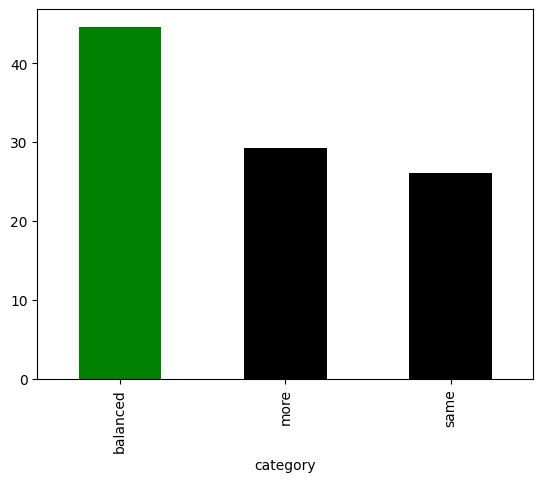

In [62]:
import_outlook = data["importOutlook"]
import_outlook.columns = ["category"]

# Count the amount of chosen category
import_outlook = import_outlook.groupby('category')['category'].count().sort_values(ascending = False)

print(import_outlook)

# Plot the relative difference
import_outlook = (import_outlook / sum(import_outlook)) * 100

max_value = import_outlook.max()
colors = ["black" if (val < max_value) else "green" for val in import_outlook]
import_outlook.plot.bar(color = colors)

44.61538461538462


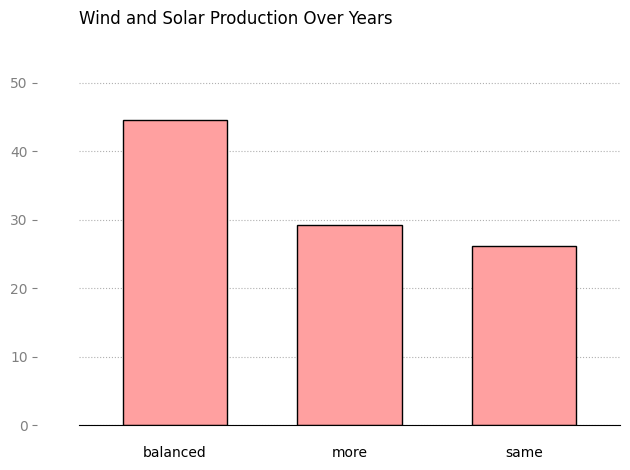

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']
plot_data = import_outlook.to_frame()

# Remove all spines
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.spines["bottom"].set_visible(True)
# Add the dataplot with zorder 2 (to be on top)
bar_width = 0.6
plot_data.plot(kind='bar', ax=ax, colormap='copper', legend=False, zorder=2, width = bar_width)

# Ensure the highest point shown is above the highest point
max_value = (plot_data).max().max()  # Find the maximum value in the dataset after multiplication
print(max_value)
ax.set_ylim(0, max_value * 1.2)  # Increase the max limit by 10% for some padding

# Change y-axis
ax.spines['left'].set_position(position=('outward', 30))
ax.tick_params(axis='y', colors= 'gray')

# Change bar-colors and the padding between the bars
groups = statistics.median(range(len(plot_data.columns)))
j, i = 0, 0
offset = bar_width * 0.03
for bar in ax.patches:
    # Adjust the padding calculation to account for the direction
    padding = -offset if i < groups else offset if i > groups else 0
    bar.set(facecolor = colors[i], x = bar.get_x() + padding,  edgecolor = "black")
    j += 1
    i = int(j / len(plot_data.index))

# Change bar-text
ax.tick_params(axis='x', length=0, labelrotation=0, labelcolor= "black", pad=15)

# Change y-acis to percentage
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Change legend
legend_values = plot_data.columns
#ax.legend(legend_values, loc='upper right', labelcolor="gray", facecolor="white", edgecolor="white", frameon=False, bbox_to_anchor=(1, 1.2))

# Add vertical box-lines with zorder 1 (behind the bars)
ax.yaxis.grid(visible=True, linestyle="dotted", zorder=1)
ax.set_axisbelow(True)

# Remove x_label
ax.set_xlabel(None)

# Add title text
ax.set_title("Wind and Solar Production Over Years ", color = "black", pad = 25, loc = 'left')
plt.tight_layout()
plt.show()

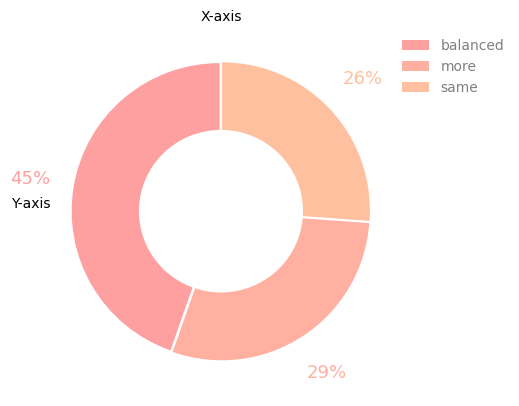

In [64]:
donut_plot(import_outlook)

category
overground     32
underground    29
nothing         4
Name: category, dtype: int64


<Axes: xlabel='category'>

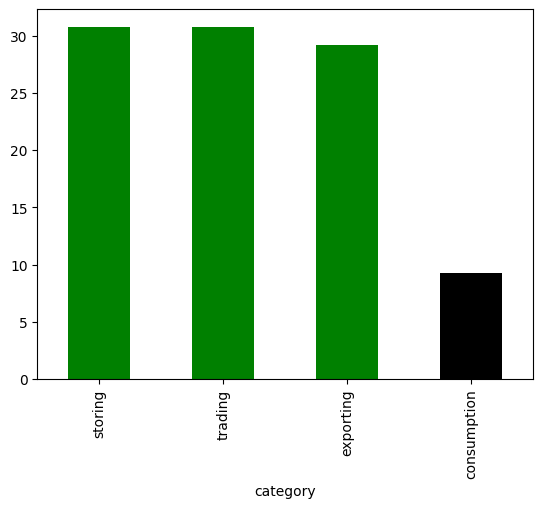

In [65]:
power_lines = data["powerLine"]
power_lines.columns = ["category"]

# Count the amount of chosen category
power_lines = power_lines.groupby('category')['category'].count().sort_values(ascending = False)

print(power_lines)

# Plot the relative difference
renewable_variance = (renewable_variance / sum(renewable_variance)) * 100

min_value = renewable_variance.min()
colors = ["green" if (val > min_value) else "black" for val in renewable_variance]
renewable_variance.plot.bar(color = colors)

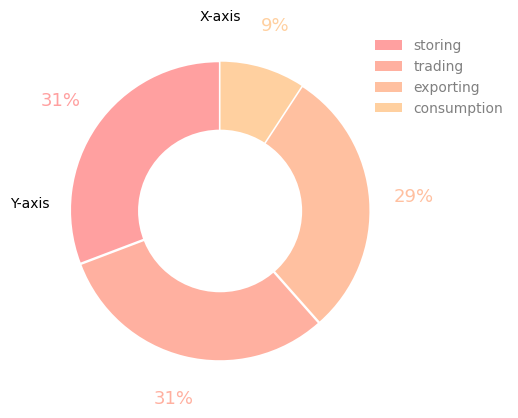

In [66]:
donut_plot(renewable_variance)

30.76923076923077


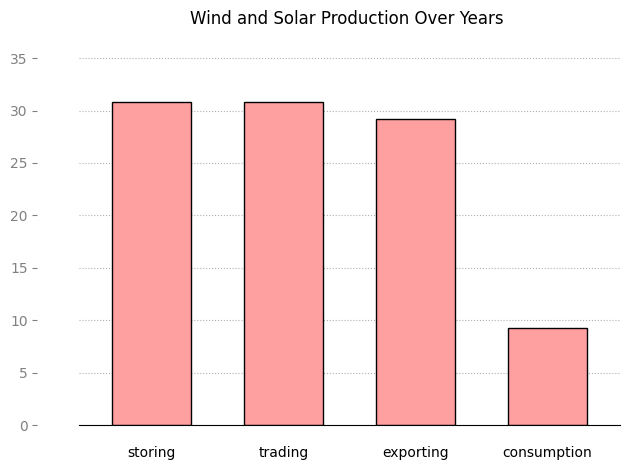

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import matplotlib.ticker as mtick

fig, ax = plt.subplots(nrows=1, ncols=1, figsize = [6.4,4.8])
colors = ['#ffa0a0', '#ffb0a0', '#ffc0a0', '#ffd0a0', '#ffe0a0', '#fff0a0']
plot_data = renewable_variance.to_frame()

# Remove all spines
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.spines["bottom"].set_visible(True)
# Add the dataplot with zorder 2 (to be on top)
bar_width = 0.6
plot_data.plot(kind='bar', ax=ax, colormap='copper', legend=False, zorder=2, width = bar_width)

# Ensure the highest point shown is above the highest point
max_value = (plot_data).max().max()  # Find the maximum value in the dataset after multiplication
print(max_value)
ax.set_ylim(0, max_value * 1.2)  # Increase the max limit by 10% for some padding

# Change y-axis
ax.spines['left'].set_position(position=('outward', 30))
ax.tick_params(axis='y', colors= 'gray')

# Change bar-colors and the padding between the bars
groups = statistics.median(range(len(plot_data.columns)))
j, i = 0, 0
offset = bar_width * 0.03
for bar in ax.patches:
    # Adjust the padding calculation to account for the direction
    padding = -offset if i < groups else offset if i > groups else 0
    bar.set(facecolor = colors[i], x = bar.get_x() + padding,  edgecolor = "black")
    j += 1
    i = int(j / len(plot_data.index))

# Change bar-text
ax.tick_params(axis='x', length=0, labelrotation=0, labelcolor= "black", pad=15)

# Change y-acis to percentage
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Change legend
legend_values = plot_data.columns
#ax.legend(legend_values, loc='upper right', labelcolor="gray", facecolor="white", edgecolor="white", frameon=False, bbox_to_anchor=(1, 1.2))

# Add vertical box-lines with zorder 1 (behind the bars)
ax.yaxis.grid(visible=True, linestyle="dotted", zorder=1)
ax.set_axisbelow(True)

# Remove x_label
ax.set_xlabel(None)

# Add title text
ax.set_title("Wind and Solar Production Over Years ", color = "black", pad = 10, loc = 'center')
plt.tight_layout()
plt.show()

<class 'matplotlib.colorbar.Colorbar'>
legend None


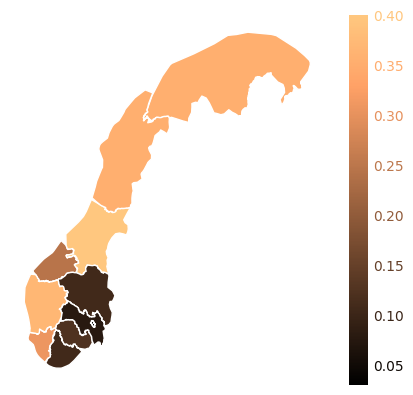

In [205]:
import geopandas
from cartopy import crs as ccrs
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors



land_path = "files/fylker.geojson"

fig, ax = plt.subplots(nrows = 1, ncols = 1)

df = geopandas.read_file(land_path)

# Insert the areas as a column
df["area"] = df.area


# Join the dataset with the geopandas frame on the municipality nr

# Group them together and count the sum for each category as a percentage
# Plot them in the figure using a colorpalett
# Do the same thing for sun and wind data (how to show the differences in a nice way???)

df_responses = data["windMun"]

n_responses = len(df_responses.index)
df_responses = df_responses.aggregate(lambda x: (x.value_counts() / n_responses)).T
df_responses.index.names = ["fylkesnummer"]
df_responses.columns = ["neg", "pos"]

# Removed unused columns
df = df.drop(columns = ["objtype", "navnerom", "versjonid", "datauttaksdato", "opphav", "datafangstdato"])

def to_percent(x, pos):
    return f'{x * 100:.0f}%'

# Use FuncFormatter with the custom function
formatter = FuncFormatter(to_percent)


combined = pd.merge(df, df_responses, on = "fylkesnummer")
combined.plot(column = "pos", 
              cmap = 'copper',
              edgecolor = "white", 
              legend = False, 
              legend_kwds=
              {
                  "drawedges": False,
                  "label": "", 
                  "orientation": "vertical",
                  "format": formatter,
                  },
              missing_kwds = # If a municipality is not chosen
              { 
                "color": "lightgrey",
                "edgecolor": "red",
                "hatch": "///",
                "label": "Missing values"
              },
              ax = ax)

# Remove spines and markers
for spine in ax.spines:
    ax.spines[spine].set_visible(False)

# Remove axis
ax.set_axis_off()
ax.set_xlabel("X-axis")

# Create a colorbar
sm = plt.cm.ScalarMappable(cmap='copper', norm=plt.Normalize(vmin=combined['pos'].min(), vmax=combined['pos'].max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.outline.set_visible(False)  # Remove the colorbar frame

cmap = cbar.cmap # Get the colormap for the colorbar

print(type(cbar))
vmin, vmax = (combined["pos"].min(), combined["pos"].max())
# Normalize object to map the value range to [0, 1]
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

for label in cbar.ax.get_yticklabels():
    val = float(label.get_text())
    normalized_val = norm(val)
    color = cmap(normalized_val)

    # set function for mpl.Text
    label.set(color = color, fontsize=10) 
    label.set_text(to_percent(val,0)) # Why doesn't this work? 

# Remove the tick-length
cbar.ax.tick_params(length=0)

# Modify the legend
legend = ax.get_legend()
print("legend", legend)